In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!git clone https://github.com/RuslanZaripov/rhtr.git

Cloning into 'rhtr'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 861 (delta 8), reused 20 (delta 7), pack-reused 832
Receiving objects: 100% (861/861), 102.57 MiB | 33.91 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [3]:
!git pull

fatal: not a git repository (or any parent up to mount point /kaggle)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [4]:
%cd /kaggle/working/rhtr

/kaggle/working/rhtr


In [5]:
import os
workdir = os.getcwd()
workdir 

'/kaggle/working/rhtr'

In [6]:
data_dir = f'{workdir}/data'
data_dir

'/kaggle/working/rhtr/data'

In [7]:
raw_dir = f'{data_dir}/raw'
raw_dir

'/kaggle/working/rhtr/data/raw'

In [8]:
!mkdir {data_dir}
!mkdir {raw_dir}

# Download Data To Process

In [9]:
!kaggle datasets download -d constantinwerner/cyrillic-handwriting-dataset -p {raw_dir}

Dataset URL: https://www.kaggle.com/datasets/constantinwerner/cyrillic-handwriting-dataset
License(s): CC0-1.0
 99%|██████████████████████████████████████▋| 1.50G/1.51G [00:10<00:00, 149MB/s]
100%|███████████████████████████████████████| 1.51G/1.51G [00:10<00:00, 153MB/s]


In [10]:
!unzip /kaggle/working/rhtr/data/raw/cyrillic-handwriting-dataset.zip -d {raw_dir + '/Cyrillic_Handwriting'} > /dev/null

In [11]:
%%writefile {workdir + "/src/ocr/scripts/htr_config.yaml"}
save_dir: 'data/experiments/Cyrillic_Handwriting_CRNN'
dataset_root: 'data/raw/Cyrillic_Handwriting'
images_dir_name: 'images' # Name of the directory containing the images
image:
  height: 32
  width: 128
optimizer:
  lr: 0.0001
dataloader:
  num_workers: 0
train:
  csv_filename: 'train.tsv'
  epochs: 100
  batch_size: 64
val:
  csv_filename: 'test.tsv'
  batch_size: 64

Overwriting /kaggle/working/rhtr/src/ocr/scripts/htr_config.yaml


In [12]:
# Open the text.txt we made earlier
text = open(f'{workdir}/src/ocr/scripts/htr_config.yaml').read()
text

"save_dir: 'data/experiments/Cyrillic_Handwriting_CRNN'\ndataset_root: 'data/raw/Cyrillic_Handwriting'\nimages_dir_name: 'images' # Name of the directory containing the images\nimage:\n  height: 32\n  width: 128\noptimizer:\n  lr: 0.0001\ndataloader:\n  num_workers: 0\ntrain:\n  csv_filename: 'train.tsv'\n  epochs: 100\n  batch_size: 64\nval:\n  csv_filename: 'test.tsv'\n  batch_size: 64\n"

In [13]:
!echo $PYTHONPATH

/kaggle/lib/kagglegym:/kaggle/lib


In [14]:
import os
os.environ['PYTHONPATH'] += f":{workdir}"

In [15]:
!python3 {workdir + "/src/ocr/scripts/train.py"} --config_path {workdir + "/src/ocr/scripts/htr_config.yaml"}

/kaggle/lib/kagglegym:/kaggle/lib:/kaggle/working/rhtr
100%|███████████████████████████████████████████| 25/25 [00:04<00:00,  5.95it/s]
31-May-24 11:39:12 - INFO - Validation: Acc: 0.0000, WER: 1.0000, CER: 0.9999, Elapsed Time: 0:00:04
100%|███████████████████████████████████████| 1129/1129 [02:03<00:00,  9.14it/s]
31-May-24 11:41:15 - INFO - Epoch: 0, Loss: 1629.7367, Acc: 0.0000, WER: 0.9998, CER: 0.9932, LR: 0.0001, Elapsed Time: 0:02:03
31-May-24 11:41:15 - INFO - Model saved to data/experiments/Cyrillic_Handwriting_CRNN/CRNN-0-0.0000.ckpt
100%|███████████████████████████████████████████| 25/25 [00:03<00:00,  7.86it/s]
31-May-24 11:41:18 - INFO - Validation: Acc: 0.0000, WER: 1.0000, CER: 0.9739, Elapsed Time: 0:00:03
100%|███████████████████████████████████████| 1129/1129 [02:01<00:00,  9.28it/s]
31-May-24 11:43:20 - INFO - Epoch: 1, Loss: 1452.4561, Acc: 0.0000, WER: 0.9959, CER: 0.9325, LR: 0.0001, Elapsed Time: 0:02:01
100%|███████████████████████████████████████████| 25/25 [0

In [16]:
from src.ocr.predictor import OCRTorchModel
model = OCRTorchModel('/kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/CRNN-42-0.1841.ckpt', '/kaggle/working/rhtr/src/ocr/scripts/htr_config.yaml')

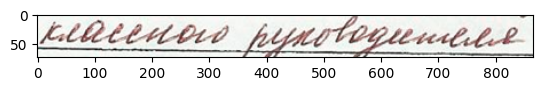

In [19]:
import cv2
import matplotlib.pyplot as plt
dataset_path = '/kaggle/working/rhtr/data/raw/Cyrillic_Handwriting/test'
image_name = os.listdir(dataset_path)[1]
im = cv2.imread(f"{dataset_path}/{image_name}")
plt.imshow(im)
plt.show()

In [20]:
model.predict([im])

['менинольрукотядлетеля']

In [26]:
from pathlib import Path
parentdir = str(Path(workdir).parent.absolute())
parentdir

'/kaggle/working'

In [29]:
!zip -r {parentdir + '/Cyrillic_Handwriting_CRNN.zip'} {workdir + "/data/experiments/Cyrillic_Handwriting_CRNN"}

  adding: kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/ (stored 0%)
  adding: kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/CRNN-42-0.1841.ckpt (deflated 7%)
  adding: kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/CRNN-38-0.1821.ckpt (deflated 7%)
  adding: kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/train.log (deflated 84%)
  adding: kaggle/working/rhtr/data/experiments/Cyrillic_Handwriting_CRNN/CRNN-32-0.1769.ckpt (deflated 7%)


In [30]:
%cd {parentdir}

/kaggle/working


In [31]:
from IPython.display import FileLink
FileLink(f"Cyrillic_Handwriting_CRNN.zip")

/kaggle/working/Cyrillic_Handwriting_CRNN.zip